ROSS Quick Start 
==========================



This is a basic tutorial on how to properly use ROSS (Rotordynamics open-source software), a simulator for rotating machinery. The majority of this code follows object-oriented coding, which is represented in this
[UML DIAGRAM](https://user-images.githubusercontent.com/32821252/50386686-131c5200-06d3-11e9-9806-f5746295be81.png).  
In the following topics we are going to discuss the most relevant classes for a quick start to use ROSS. 


# Materials

There is a class called Material to hold material's properties.


In [1]:
import ross as rs
from bokeh.io import output_notebook
import numpy as np
import matplotlib.pyplot as plt

output_notebook()

Steel = rs.Material(name="Steel", rho=7810, E=211e9, G_s=81.2e9)

Loading BokehJS ...

Where:
    - 'name' is a parameter used to identificate the material.
    - 'rho' is the density of this material
    - 'E' is the Young's modulus.
    - 'G_s' is the Shear modulus.  
Note that, to instatiate a Material class, you only need to give 2 out of the following parameters: 'E', 'G_s' ,'rho'.

Saving a Material
------------
To save an already instantiated Material object, you need to use the following method.

In [2]:
Steel.save_material()

Loading a Material
------
To load a material, first of all, use the available_materials() method to check if your material is instantiated, then you should use the Material.use_material('name') method with the name of the material as a parameter.



In [3]:
rs.Material.available_materials()

['Steel']

In [4]:
steel = rs.Material.use_material('Steel')


# Element
----------------------------------
Element is an abstract class(not directly used in the program), this class is mainly used to organize the code and make it more intuitive.  
- All the classes which derives from Element ends with Element in their respective names.
- Every element is placed in a node, which is the junction of two elements.

# ShaftElement
------------------------------------
There are two methods that you could use to model this element:  
* Euler–Bernoulli beam Theory
* Timoshenko beam Theory (used as default)


This Element represents the rotor's shaft, all the other elements are correlated with this one.  
This class can be instantiated as the code that follows.  
Where:
- 'i_d': the shaft's internal diameter (zero when dealing with a solid shaft).
- 'o_d': the shaft's outter diameter.
- 'n': the node where the shaft elements starts.
- 'L': the length of the shaft element.

In [5]:
i_d = 0
o_d = 0.05
n = 6
l_list = [0.25 for _ in range(n)]

shaft_elements = [rs.ShaftElement(L=l,
                                  i_d=i_d,
                                  o_d=o_d,
                                  material=steel,
                                  shear_effects=True,
                                  rotary_inertia=True,
                                  gyroscopic=True
                                  ) for l in l_list]

# DiskElement
-----------------
As the name says this class represents a Disk.  
We can see an example of instantiation of this class in the following lines of code.  

Where:
- 'n' is the node where this disk is stored.
- 'Id' is the Diametral moment of inertia.
- 'Ip' is the Polar moment of inertia.
- 'm' is the mass of the Disk.

All the values are following the S.I. convention.  

In [6]:
Disk = rs.DiskElement(n=0, m=32.58972765, Id=0.17808928, Ip=0.32956362)
print(Disk)

### From geometry DiskElement instatiation

Besides the instatiation previously explained, there is a way to instantiate a DiskElement with only geometrical parameters (for cylindrical disks) and the material which this disk is made of, as we can see in the following code.  
- 'n' is the node where the disk is stored.
- 'i_d' is the internal diameter of the disk(usually it's the same as the outter diameter of the shaft where the disk is placed.
- 'o_d' is the outter diameter of the disk.
- 'material' is the material which the disk is made of.
- 'width' is the disk's width

In [7]:
disk0 = rs.DiskElement.from_geometry(n=2,
                                     material=steel,
                                   width=0.07,
                                  i_d=0.05,
                                  o_d=0.28
                                  )
disk1 = rs.DiskElement.from_geometry(n=4,
                                  material=steel,
                                  width=0.07,
                                  i_d=0.05,
                                  o_d=0.28
                                  )
disks = [disk0,disk1]

# BearingElement
---------------------
As it says on the name, this class is a bearing.  
The following code demonstrate how to properly instantiate it.
- 'n' is the node in which the bearing is located.
- 'kxx' is a stiffness coefficient that corresponds to the term from the stiffness matrix.
- 'kyy' is a stiffness coefficient that corresponds to the term from the stiffness matrix.
- 'cxx' is a damping coefficient that corresponds to the term from the damping matrix.

P.S.: Note that the coefficients could be an array with different coefficients for different rotation speeds, in that case you only have to give a parameter 'w' which is a array with the same size as the coefficients array.  

P.S.2: The coefficients are not limitated by kxx and kyy, you can also give cross-coupled coefficients.

In [8]:
stfx = 1e6
stfy = 0.8e6
bearing0 = rs.BearingElement(n=0, kxx=stfx, kyy=stfy, cxx=1e3, w=np.linspace(0,200,101))
bearing1 = rs.BearingElement(n=6, kxx=stfx, kyy=stfy, cxx=1e3, w=np.linspace(0,200,101))
bearings = [bearing0, bearing1]

Instantiating bearings from excel archives
--------------------
There's a class method to instantiate a bearing from excel tables, as we can see in the following code.

##### There will be a class method to instantiate a bearing from excel tables. - work in progress

# Rotor
----------------
This class unifies all the Element classes in the program and assembles the mass, damping and stiffness matrices of each element, building up matrices for the global system. Apart from that, it also outputs all the results classes obtained by the simulation.  

To use this class you only have to give all the already instantiated elements in a list format, as it follows.

In [9]:
rotor1 = rs.Rotor(shaft_elements,
                  disks,
                  bearings 
                  )

To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()


From section instantiation of a Rotor
----------------
In this form of instantiation, the number of shaft elements used in FEM are not fixed, instead, the program does a convergence analysis, testing the number of elements to a point where the relative error between iterations reaches a value that can be neglected.  
To use this method, you should divide the rotor in a way where the number of shaft elements is minimal and place every element (except for the shaft elements) in the minimal nodes

In [10]:
i_d = 0
o_d = 0.05

i_ds_data = [0,0,0]
o_ds_data = [0.05, 0.05, 0.05]
leng_data = [0.5, 0.5, 0.5]

stfx = 1e6
stfy = 0.8e6
bearing0 = rs.BearingElement(n=0, kxx=stfx, kyy=stfy, cxx=1e3, w=np.linspace(0,200,101))
bearing1 = rs.BearingElement(n=3, kxx=stfx, kyy=stfy, cxx=1e3, w=np.linspace(0,200,101))
bearings = [bearing0, bearing1]

disk0 = rs.DiskElement.from_geometry(n=1,
                                     material=steel,
                                     width=0.07,
                                     i_d=0.05,
                                     o_d=0.28
                                    )
disk1 = rs.DiskElement.from_geometry(n=2,
                                     material=steel,
                                     width=0.07,
                                     i_d=0.05,
                                     o_d=0.28
                                    )
disks = [disk0,disk1]

rotor2 = rs.Rotor.from_section(brg_seal_data=bearings,
                               disk_data=disks,
                               i_ds_data=i_ds_data,
                               leng_data=leng_data,
                               o_ds_data=o_ds_data, 
                              )


To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()


Visualizing the Rotor
---------
It is interesting to plot the rotor to check if it's really what you wanted to instantiate, you can plot it with the following code.

Note: There are two plots, one with bokeh plot and one with matplotlib, you can either turn on or off the matplotlib one.


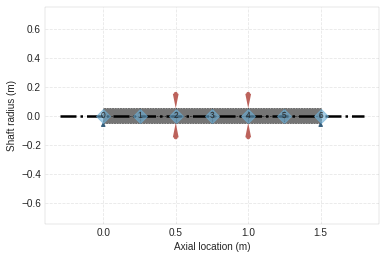

In [11]:
rotor1.plot_rotor()

Running the simulation
------
After you verify that everything is fine with the rotor, you should run the simulation and obtain results. To do that you only need to use the run() method like the code bellow. 

In [12]:
rotor1.run()
rotor2.run()

# Obtaining results
-------------------
These are the following analysis you can do with the program:
- Static analysis
- Campbell Diagram
- Frequency response
- Forced response
- Mode Shapes

## Static analysis
--------

This method gives a free body diagram and a exagerated plot of the rotor response to gravity effects.

In [13]:
rotor1.static()


Campbell Diagram
============
In this example we can see the campbell diagram from 0 to 4000 RPM.

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa214c334e0>)

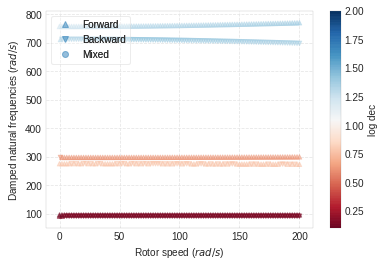

In [14]:
campbell = rotor1.campbell(np.linspace(0,200,101))
campbell.plot()

Frenquency Response
=========
We can put the frequency response of 

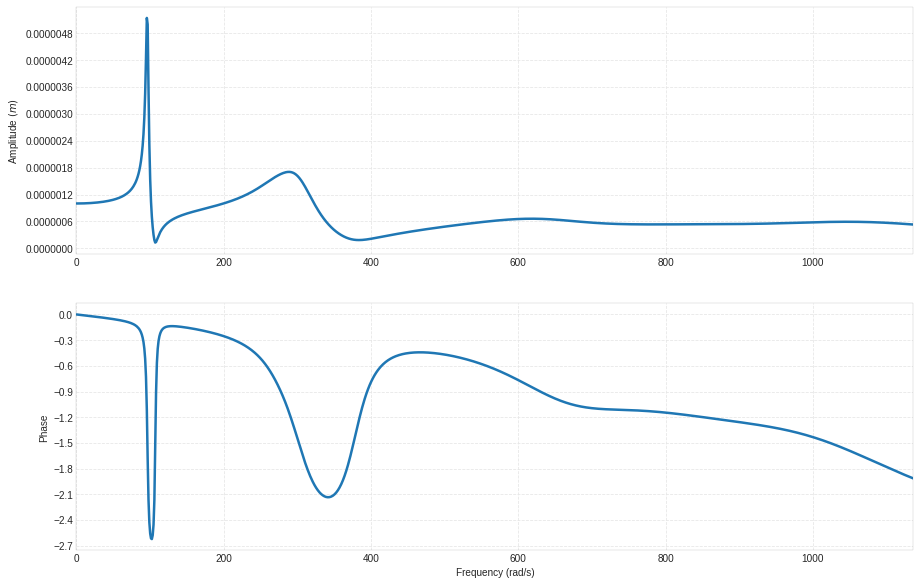

In [17]:
rotor1.freq_response().plot(inp=0,out=0)
plt.rcParams["figure.figsize"] = (15,10)